In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters, feature
from skimage.feature import hessian_matrix, hessian_matrix_eigvals


def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True)
    fig.set_size_inches(12,4)
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()
    
def cover_ratio(transformed, label): #what part of white pixels were actually covered
    return np.sum(transformed * label)/np.sum(label)

def accuracy(transformed, label):
    return (transformed == label).sum()/(label.shape[1]*label.shape[0])

def detect_ridges(gray, sigma=1.0):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges
 
    
def process_img(img_path, mask_path, label_path):    
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path) #cause cv2 can't read gifs :X
    labeled = plt.imread(label_path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

    #plot_images(rgb, gray, mask)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    hist_eq = clahe.apply(gray)

    gamma = 1.2
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    gamma_corrected = cv2.LUT(hist_eq, table)

    # fast cv2 denoising
    denoised = cv2.fastNlMeansDenoising(gamma_corrected.astype('uint8'), None, 3,7)

    #plot_images(hist_eq, gamma_corrected, denoised)

    a, b = detect_ridges(denoised, sigma=3.0)

    #plot_images(denoised, a, b)

    a = a + (a.min() * (-1)) #just some normalization stuff, because we were going negative
    a = a/a.max()
    a = a*255
    a = a.astype('uint8') # basic conversion for cv2 operations to work properly

    #applying a mask
    masked = np.zeros(a.shape)
    masked[mask > 0] = a[mask > 0]



    median  = cv2.medianBlur(masked.astype('uint8'), 5)


    median = 255-median

    ret,thresh = cv2.threshold(median.astype('uint8'),165,255,cv2.THRESH_BINARY_INV)
    #thresh = cv2.adaptiveThreshold(median.astype('uint8'),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    #            cv2.THRESH_BINARY_INV,5,2)
    #ret3,th4 = cv2.threshold(median.astype('uint8'),80,90,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #plot_images(masked, median, thresh)

    plot_images(rgb, thresh, labeled)
    print(accuracy(thresh, labeled))
    return thresh, labeled, accuracy(thresh, labeled)

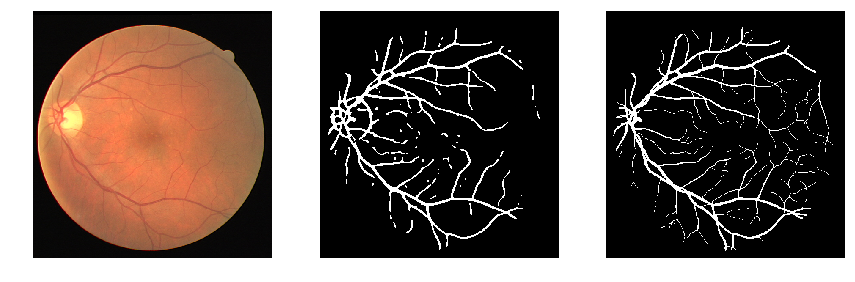

0.9597405746151049


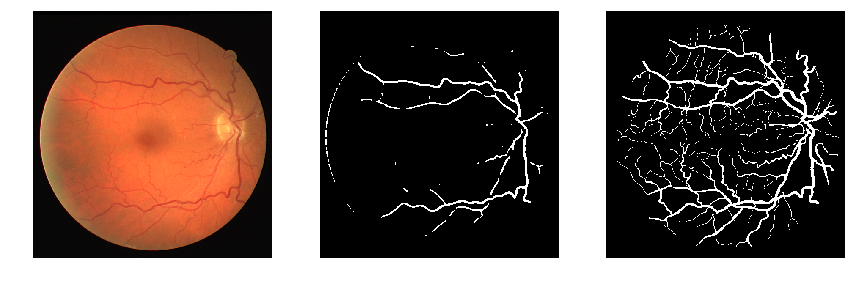

0.9369681173475572


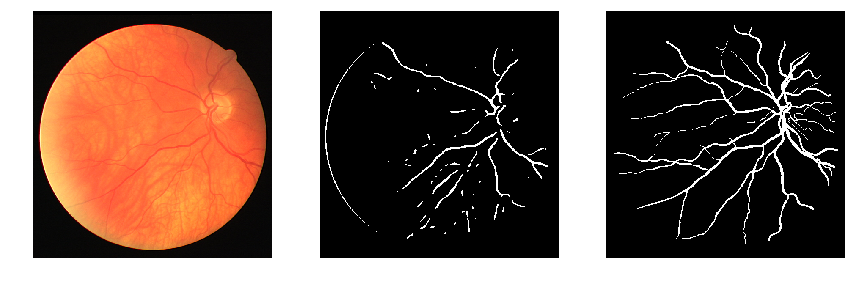

0.9478421626863862


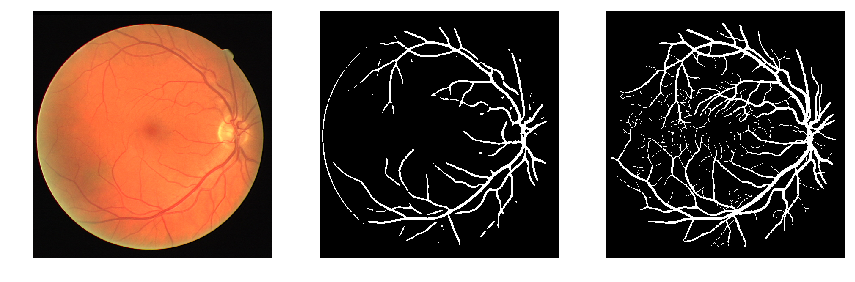

0.939083525275791


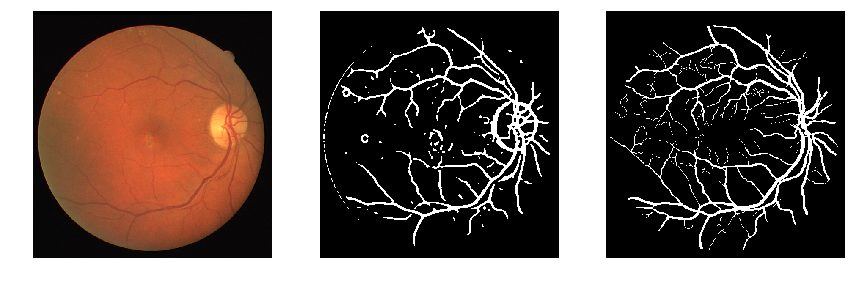

0.9417232391805067


In [14]:
t,l,acc = process_img('data/DRIVE/training/images/21_training.tif','data/DRIVE/training/mask/21_training_mask.gif','data/DRIVE/training/1st_manual/21_manual1.gif')

t,l,acc = process_img('data/DRIVE/training/images/22_training.tif','data/DRIVE/training/mask/22_training_mask.gif','data/DRIVE/training/1st_manual/22_manual1.gif')

t,l,acc = process_img('data/DRIVE/training/images/23_training.tif','data/DRIVE/training/mask/23_training_mask.gif','data/DRIVE/training/1st_manual/23_manual1.gif')

t,l,acc = process_img('data/DRIVE/training/images/24_training.tif','data/DRIVE/training/mask/24_training_mask.gif','data/DRIVE/training/1st_manual/24_manual1.gif')
t,l,acc = process_img('data/DRIVE/training/images/25_training.tif','data/DRIVE/training/mask/25_training_mask.gif','data/DRIVE/training/1st_manual/25_manual1.gif')